# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


In [3]:
#url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
#city_data = []

#units= "metric"

In [4]:
    # Create endpoint URL with each city
#city_url = f"{url}appid={weather_api_key}&q="


In [6]:
        # Parse the JSON and retrieve data
#city_weather = requests.get(city_url)
#city_weather_json = city_weather.json()
#pprint(city_weather_json)

In [8]:
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': -64.2615, 'lat': -27.7951},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 92.16,
  'feels_like': 90.28,
  'temp_min': 92.16,
  'temp_max': 92.16,
  'pressure': 1006,
  'humidity': 29,
  'sea_level': 1006,
  'grnd_level': 985},
 'visibility': 10000,
 'wind': {'speed': 8.72, 'deg': 22, 'gust': 8.25},
 'clouds': {'all': 100},
 'dt': 1675632428,
 'sys': {'country': 'AR', 'sunrise': 1675590744, 'sunset': 1675638580},
 'timezone': -10800,
 'id': 3835869,
 'name': 'Santiago del Estero',
 'cod': 200}

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
#url = "http://api.openweathermap.org/data/2.5/weather?"
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #f"{url}appid={weather_api_key}&q="
    #url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data

        city_weather = requests.get(city_url).json()
        
        

                # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_country = city_weather["sys"]["country"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_date = city_weather['dt']
        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date":city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | san jeronimo
Processing Record 3 of Set 1 | rio gallegos
Processing Record 4 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 5 of Set 1 | klaksvik
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | camacha
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | sisimiut
Processing Record 11 of Set 1 | urbana
Processing Record 12 of Set 1 | ibra
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | lorengau
Processing Record 15 of Set 1 | luderitz
Processing Record 16 of Set 1 | vila franca do campo
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | kahului
Processing Record 20 of Set 1 | yerbogachen
Processing Record 21 of Set 1 | abu samrah
Processing Record 22 of Set 1 | malim
P

City not found. Skipping...
Processing Record 35 of Set 4 | erenhot
Processing Record 36 of Set 4 | awjilah
Processing Record 37 of Set 4 | san rafael
Processing Record 38 of Set 4 | eureka
Processing Record 39 of Set 4 | severo-kurilsk
Processing Record 40 of Set 4 | ukiah
Processing Record 41 of Set 4 | longyearbyen
Processing Record 42 of Set 4 | malwan
City not found. Skipping...
Processing Record 43 of Set 4 | vostok
Processing Record 44 of Set 4 | kawalu
Processing Record 45 of Set 4 | puerto narino
Processing Record 46 of Set 4 | port blair
Processing Record 47 of Set 4 | conde
Processing Record 48 of Set 4 | amderma
City not found. Skipping...
Processing Record 49 of Set 4 | tanete
Processing Record 0 of Set 5 | mokhsogollokh
Processing Record 1 of Set 5 | soyo
Processing Record 2 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 3 of Set 5 | mapastepec
Processing Record 4 of Set 5 | alice springs
Processing Record 5 of Set 5 | hobyo
Processing Record 6 of Set 5 

Processing Record 21 of Set 8 | camacupa
Processing Record 22 of Set 8 | afmadu
City not found. Skipping...
Processing Record 23 of Set 8 | hedaru
Processing Record 24 of Set 8 | dhidhdhoo
Processing Record 25 of Set 8 | dingle
Processing Record 26 of Set 8 | beyneu
Processing Record 27 of Set 8 | verkh-suetka
Processing Record 28 of Set 8 | acarau
Processing Record 29 of Set 8 | baruun-urt
Processing Record 30 of Set 8 | kuryk
Processing Record 31 of Set 8 | vila velha
Processing Record 32 of Set 8 | yanan
City not found. Skipping...
Processing Record 33 of Set 8 | lixourion
Processing Record 34 of Set 8 | bogovina
Processing Record 35 of Set 8 | morshyn
Processing Record 36 of Set 8 | orange cove
Processing Record 37 of Set 8 | pampa
Processing Record 38 of Set 8 | bandarbeyla
Processing Record 39 of Set 8 | nizhniy ingash
Processing Record 40 of Set 8 | chama
Processing Record 41 of Set 8 | razole
Processing Record 42 of Set 8 | quatre cocos
Processing Record 43 of Set 8 | whitehors

Processing Record 6 of Set 12 | sabang
Processing Record 7 of Set 12 | eyl
Processing Record 8 of Set 12 | luoyang
Processing Record 9 of Set 12 | bondoukou
Processing Record 10 of Set 12 | faridan
City not found. Skipping...
Processing Record 11 of Set 12 | pidhaytsi
Processing Record 12 of Set 12 | olinda
Processing Record 13 of Set 12 | ocala
Processing Record 14 of Set 12 | padang
Processing Record 15 of Set 12 | garhi khairo
Processing Record 16 of Set 12 | san andres
Processing Record 17 of Set 12 | tibati
Processing Record 18 of Set 12 | sal rei
Processing Record 19 of Set 12 | crvenka
Processing Record 20 of Set 12 | poum
Processing Record 21 of Set 12 | the pas
Processing Record 22 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 23 of Set 12 | la virtud
Processing Record 24 of Set 12 | ambanja
Processing Record 25 of Set 12 | dolores hidalgo
Processing Record 26 of Set 12 | zyryanka
Processing Record 27 of Set 12 | salym
Processing Record 28 of Set 12 | aban


In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          544
Lat           544
Lng           544
Max Temp      544
Humidity      544
Cloudiness    544
Wind Speed    544
Country       544
Date          544
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,72.7868,-56.1549,-11.40,93,100,6.13,GL,1675632507
1,San Jeronimo,-11.9472,-75.2829,58.44,63,81,7.36,PE,1675632789
2,Rio Gallegos,-51.6226,-69.2181,62.65,31,75,32.21,AR,1675632726
3,Klaksvik,62.2266,-6.5890,47.32,92,100,35.03,FO,1675632790
4,Butaritari,3.0707,172.7902,80.24,83,100,19.15,KI,1675632524


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Upernavik,72.7868,-56.1549,-11.40,93,100,6.13,GL,1675632507
1,San Jeronimo,-11.9472,-75.2829,58.44,63,81,7.36,PE,1675632789
2,Rio Gallegos,-51.6226,-69.2181,62.65,31,75,32.21,AR,1675632726
3,Klaksvik,62.2266,-6.5890,47.32,92,100,35.03,FO,1675632790
4,Butaritari,3.0707,172.7902,80.24,83,100,19.15,KI,1675632524


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

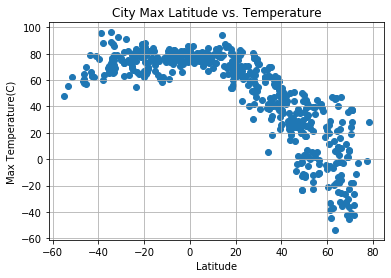

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df["Max Temp"], marker='o')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.ylabel("Max Temperature(C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

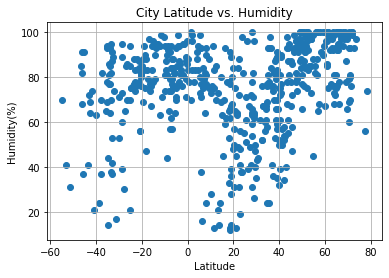

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df["Humidity"], marker='o')

# Incorporate the other graph properties


plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

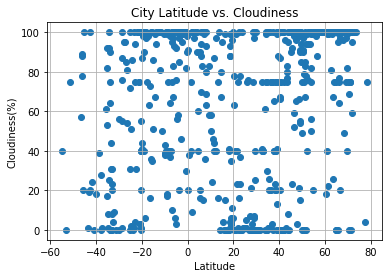

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df["Cloudiness"], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

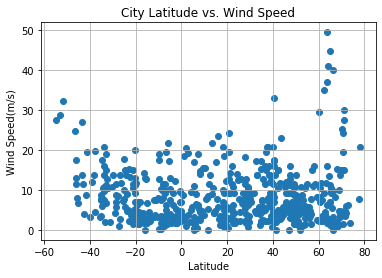

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df["Wind Speed"], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed(m/s)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
(slope,intercept,rvalue,pvalue,stderr)=stats.lineregress(city_data_df['Lat'], city_data_df["Max Temp"])

y_pred = city_data_df['Lat']*slope + intercept
line_equation = f"y = {slope}x +{intercept}"

NameError: name 'stats' is not defined

In [53]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Upernavik,72.7868,-56.1549,-11.40,93,100,6.13,GL,1675632507
3,Klaksvik,62.2266,-6.5890,47.32,92,100,35.03,FO,1675632790
4,Butaritari,3.0707,172.7902,80.24,83,100,19.15,KI,1675632524
5,Thompson,55.7435,-97.8558,5.16,85,100,5.75,CA,1675632560
6,Camacha,33.0833,-16.3333,58.42,67,40,13.80,PT,1675632793


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,San Jeronimo,-11.9472,-75.2829,58.44,63,81,7.36,PE,1675632789
2,Rio Gallegos,-51.6226,-69.2181,62.65,31,75,32.21,AR,1675632726
7,Rikitea,-23.1203,-134.9692,79.05,74,4,15.28,PF,1675632794
11,Bluff,-46.6000,168.3333,58.91,85,57,24.67,NZ,1675632796
12,Lorengau,-2.0226,147.2712,81.21,81,100,3.78,PG,1675632798


###  Temperature vs. Latitude Linear Regression Plot

In [54]:
# Linear regression on Northern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=stats.linregress(northern_hemi_df['Lat'], northern_hemi_df["Max Temp"])

y_pred = northern_hemi_df['Lat']*slope + intercept
line_equation = f"y = {round(slope,2)}x +{round(intercept,2)}"
line_equation

'y = -1.42x +94.58'

R-squared:0.6972949613104626


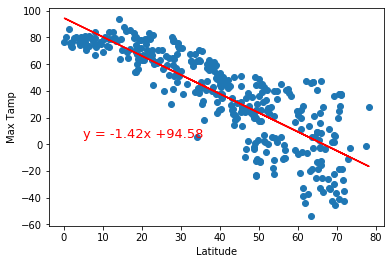

In [55]:
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df["Max Temp"], marker='o')
plt.plot(northern_hemi_df['Lat'], y_pred, color = 'r')
plt.ylabel("Max Tamp")
plt.xlabel("Latitude")

plt.annotate(line_equation,xy=(5,5), fontsize=13, color='r')

#print r value
print(f"R-squared:{rvalue**2}")

plt.show()

In [78]:
# Linear regression on Southern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=stats.linregress(southern_hemi_df['Lat'], southern_hemi_df["Max Temp"])

y_pred = southern_hemi_df['Lat']*slope + intercept
line_equation = f"y = {round(slope,2)}x +{round(intercept,2)}"
line_equation


'y = 0.22x +79.48'

R-squared:0.12648400123236345


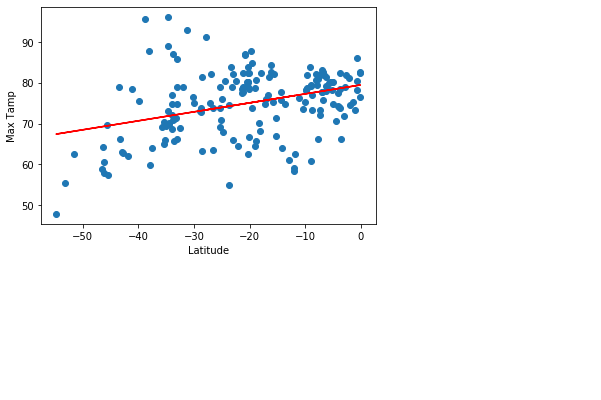

In [79]:
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df["Max Temp"], marker='o')
plt.plot(southern_hemi_df['Lat'], y_pred, color = 'r')
plt.ylabel("Max Tamp")
plt.xlabel("Latitude")

print(f"R-squared:{rvalue**2}")

plt.annotate(line_equation,(10,5), fontsize=20, color='r')

plt.show()

**Discussion about the linear relationship:** Cities in the Northern Hemisphere that have a higher latitude, are lower in temp. Cities in the Souther Hemisphere that have higher latitude, are higher temp.Positive linear relationship

### Humidity vs. Latitude Linear Regression Plot

R-squared:0.18359309298302084


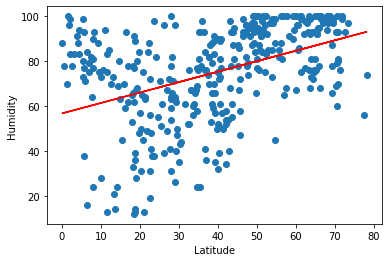

In [73]:
# Northern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=stats.linregress(northern_hemi_df['Lat'], northern_hemi_df["Humidity"])

y_pred = northern_hemi_df['Lat']*slope + intercept
line_equation = f"y = {round(slope,2)}x +{round(intercept,2)}"
line_equation

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df["Humidity"], marker='o')
plt.plot(northern_hemi_df['Lat'], y_pred, color = 'r')
plt.ylabel("Humidity")
plt.xlabel("Latitude")

plt.annotate(line_equation,xy=(5,5), fontsize=13, color='r')

#print r value
print(f"R-squared:{rvalue**2}")

plt.show()

R-squared:0.1577556822004146


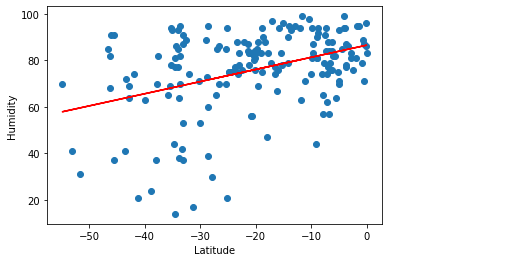

In [75]:
# Southern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=stats.linregress(southern_hemi_df['Lat'], southern_hemi_df["Humidity"])

y_pred = southern_hemi_df['Lat']*slope + intercept
line_equation = f"y = {round(slope,2)}x +{round(intercept,2)}"
line_equation

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df["Humidity"], marker='o')
plt.plot(southern_hemi_df['Lat'], y_pred, color = 'r')
plt.ylabel("Humidity")
plt.xlabel("Latitude")

plt.annotate(line_equation,xy=(5,5), fontsize=13, color='r')

#print r value
print(f"R-squared:{rvalue**2}")

plt.show()

**Discussion about the linear relationship:** as lat increases, humidity increases

### Cloudiness vs. Latitude Linear Regression Plot

R-squared:0.09157133338218104


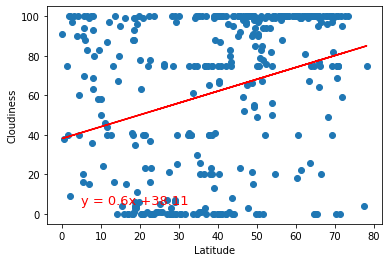

In [76]:
# Northern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=stats.linregress(northern_hemi_df['Lat'], northern_hemi_df["Cloudiness"])

y_pred = northern_hemi_df['Lat']*slope + intercept
line_equation = f"y = {round(slope,2)}x +{round(intercept,2)}"
line_equation

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df["Cloudiness"], marker='o')
plt.plot(northern_hemi_df['Lat'], y_pred, color = 'r')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

plt.annotate(line_equation,xy=(5,5), fontsize=13, color='r')

#print r value
print(f"R-squared:{rvalue**2}")

plt.show()

R-squared:0.13053174139252247


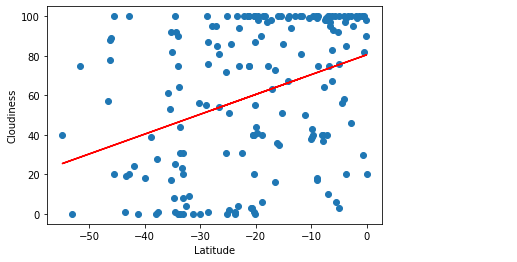

In [77]:
# Southern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=stats.linregress(southern_hemi_df['Lat'], southern_hemi_df["Cloudiness"])

y_pred = southern_hemi_df['Lat']*slope + intercept
line_equation = f"y = {round(slope,2)}x +{round(intercept,2)}"
line_equation

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df["Cloudiness"], marker='o')
plt.plot(southern_hemi_df['Lat'], y_pred, color = 'r')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

plt.annotate(line_equation,xy=(5,5), fontsize=13, color='r')

#print r value
print(f"R-squared:{rvalue**2}")

plt.show()

**Discussion about the linear relationship:** weak linear relationship on lat and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

R-squared:0.0075925079550332305


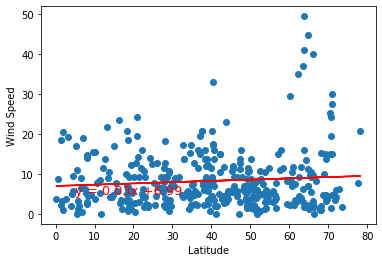

In [80]:
# Northern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=stats.linregress(northern_hemi_df['Lat'], northern_hemi_df["Wind Speed"])

y_pred = northern_hemi_df['Lat']*slope + intercept
line_equation = f"y = {round(slope,2)}x +{round(intercept,2)}"
line_equation

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df["Wind Speed"], marker='o')
plt.plot(northern_hemi_df['Lat'], y_pred, color = 'r')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

plt.annotate(line_equation,xy=(5,5), fontsize=13, color='r')

#print r value
print(f"R-squared:{rvalue**2}")

plt.show()

R-squared:0.2028131303718091


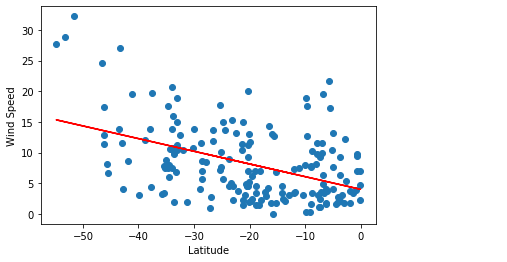

In [82]:
# Southern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=stats.linregress(southern_hemi_df['Lat'], southern_hemi_df["Wind Speed"])

y_pred = southern_hemi_df['Lat']*slope + intercept
line_equation = f"y = {round(slope,2)}x +{round(intercept,2)}"
line_equation

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df["Wind Speed"], marker='o')
plt.plot(southern_hemi_df['Lat'], y_pred, color = 'r')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

plt.annotate(line_equation,xy=(5,5), fontsize=13, color='r')

#print r value
print(f"R-squared:{rvalue**2}")

plt.show()

**Discussion about the linear relationship:** string position linear relationship in the northern data. Strong negative linear relationship in the southern data.
